In [1]:
from matplotlib import pyplot as plt
import pandas as np
import random
import numpy as np

In [2]:
nodes = []
random.random()
main_nodes = dict()

main_node_connected_to_central = dict()
connected_main_nodes = []
main_nodes = dict()
nodes_hash = dict()
# main_node = dict()
xs = [x[0] for x in nodes]
ys = [y[1] for y in nodes]
edge_list_per_cluster = dict()
central_node = (0, 0)

k = 5
i = 0
bounds_xs = np.linspace(-20, 20, k)
bounds_ys = np.linspace(-20, 20, k)
bounds_xs

array([-20., -10.,   0.,  10.,  20.])

In [3]:
def euclid(t1, t2):
    import math
    return math.sqrt((t1[0] - t2[0])**2 + (t1[1] - t2[1])**2)

In [4]:
def inSameCluster(t1, t2, bounds_xs, i, bounds_ys, j, k):
    try:
        if t1[0] >= bounds_xs[i] and t2[0] >= bounds_xs[i] and t1[0] < bounds_xs[i +1]and t2[0] < bounds_xs[i+1] : 
            if t1[1] >= bounds_ys[j] and t2[1] >= bounds_ys[j] and t1[1] < bounds_ys[j+1] and t2[1] < bounds_ys[j+1]:
                return True
        return False
    except:
        return True

In [5]:
def draw_main_nodes(main_nodes : dict):
    for node in main_nodes.values():
        plt.scatter([node[0]], [node[1]], color = "red", s = 100)

In [6]:
def number_of_main_nodes_not_connected_to_central(main_nodes):
    counter = 0 
    for node in main_nodes.values():
        if main_node_connected_to_central[node] == False:
            counter +=1
            
    return counter > 0 

In [7]:
def draw_edges_for_current_cluster(list_edge):
    for edge in list_edge:
        plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color = "green")
        plt.scatter([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]])        

In [8]:
def draw_edges(edge_list):
    for key in edge_list.keys():
#         print(edge_list[i])
#         i = edge_list[j]
        draw_edges_for_current_cluster(edge_list[key])
#         plt.plot([i[0][0], i[1][0]], [i[1][0], i[1][1]])

In [9]:
def draw_graph():
    for i_0 in range(len(bounds_xs)):
        for j_0 in range(len(bounds_ys)):
            plt.plot([bounds_xs[i_0], bounds_xs[i_0]], [min(bounds_ys), max(bounds_xs)], color ="green", dashes = [1])
            plt.plot([min(bounds_xs), max(bounds_xs)], [bounds_ys[j_0], bounds_ys[j_0]], color ="green", dashes = [1])



In [10]:
def connect_main_nodes(main_nodes : dict):
    connected_main_nodes = []
    for node in main_nodes.values():
        neighbour = find_closest_neighbour(node, main_nodes.values())
        connected_main_nodes.append((node, neighbour))
    return connected_main_nodes

In [11]:
# for x in connect_main_nodes(main_nodes):
#     if x[1] != None:
#         plt.plot([x[0][0], x[1][0]], [x[0][1], x[1][1]])
#         plt.scatter([x[0][0], x[1][0]], [x[0][1], x[1][1]])

In [12]:
def init_main_nodes_connected_to_central():
    for node in main_nodes.values():
        main_node_connected_to_central[node] = False
    

In [13]:
def find_closest_node_to_central(main_nodes):
    max_dist = float('inf')
    closest_node = None
    for node in main_nodes.values():
        if euclid(node, central_node) < max_dist and main_node_connected_to_central[node] == False:
            max_dist = euclid(node, central_node)
            closest_node = node
    
    return closest_node

In [14]:
def flag_main_nodes_as_true_recursively():
    pass

In [15]:
(1,2) not in [(1,3),(2,3)]

True

In [16]:
def find_closest_neighbour(current_node, other_nodes):
    min_dist = float('inf')
    closest = None
    for tmp_node in other_nodes:
        if current_node != tmp_node and ((tmp_node, current_node) not in connected_main_nodes) and ((current_node, tmp_node) not in connected_main_nodes):
            if euclid(current_node, tmp_node) < min_dist:
                min_dist = euclid(current_node, tmp_node)
                closest = tmp_node
    return closest

In [17]:
def find_max_node(hash_map_of_nodes : dict):
    return sorted(hash_map_of_nodes, key = lambda x: hash_map_of_nodes[x], reverse = True)[0]

In [18]:
def make_unique_list_from_tuples(list_of_tuples):
    unique = []
    for x in list_of_tuples:
        unique.append(x[0])
        unique.append(x[1])
#     print(unique)
#     print([unique.count(x) for x in unique])
    return(unique)

In [19]:
def count_for_every_node_in_cluster(unique_list):
    hash_map = dict()
    for x in unique_list:
        hash_map[x] = unique_list.count(x)
#     print(hash_map)
    return hash_map

In [30]:
(1,x) in [(1,2), (2,3)]

False

In [35]:
def recursively_set_other_nodes_as_connected_to_central(closest_node, main_node_connected_to_central, connected_main_nodes):
    for pair_of_nodes in connected_main_nodes:
        if closest_node == pair_of_nodes[0] or closest_node == pair_of_nodes[1]:
            print("chaning_hash map for {}".format(pair_of_nodes))
            if closest_node == pair_of_nodes[0]:
                return pair_of_nodes[1]
            else:
                return pair_of_nodes[0]

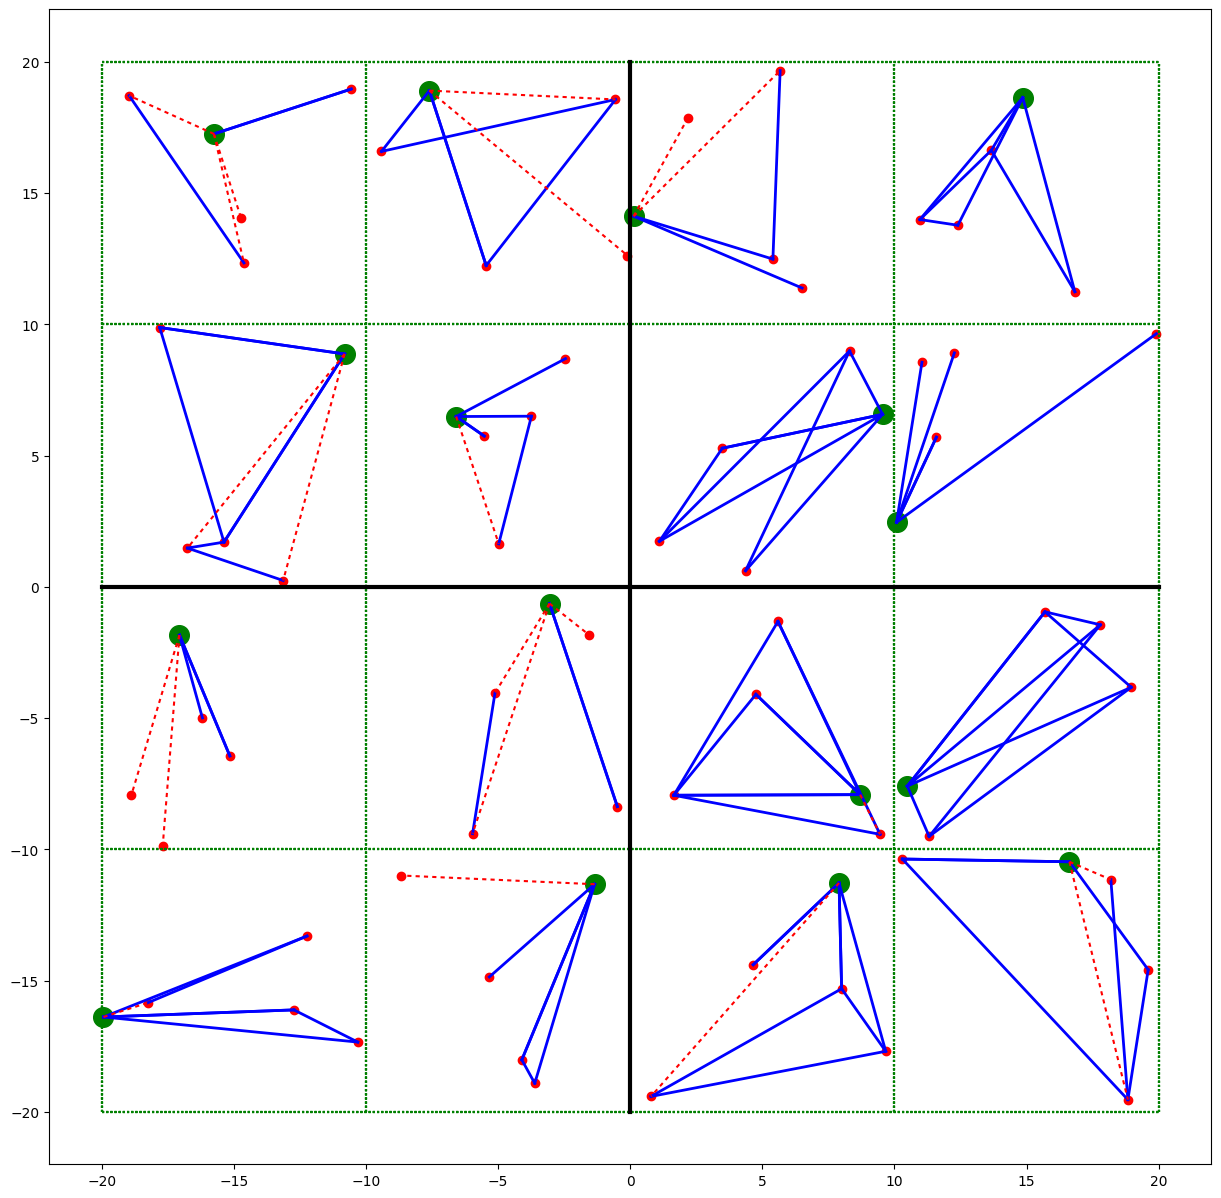

In [20]:

plt.figure(figsize=(15, 15))
for i_0 in range(len(bounds_xs)):
    for j_0 in range(len(bounds_ys)):
        plt.plot([bounds_xs[i_0], bounds_xs[i_0]], [min(bounds_ys), max(bounds_xs)], color ="green", dashes = [1])
        plt.plot([min(bounds_xs), max(bounds_xs)], [bounds_ys[j_0], bounds_ys[j_0]], color ="green", dashes = [1])



for i_0 in range(1,len(bounds_xs)):
    for j_0 in range(1,len(bounds_ys)):
#         plt.plot([bounds_xs[i_0], bounds_xs[i_0]], [min_ys - 2, max_ys +2], color ="green", dashes = [1])
#         plt.plot([min_xs - 2, max_xs + 2], [bounds_ys[j_0], bounds_ys[j_0]], color ="green", dashes = [1])
        list_of_nodes_in_current_cluster = []
        for _ in range(5):
            node = (random.uniform(bounds_xs[i_0-1], bounds_xs[i_0]), random.uniform(bounds_ys[j_0-1], bounds_ys[j_0]))
            plt.scatter([node[0]],[node[1]], color = "red")
            list_of_nodes_in_current_cluster.append(node)
        nodes_hash["cluster_{}_{}".format(i_0, j_0)] = list_of_nodes_in_current_cluster
        edges_for_current_cluster = []
        for i in range(len(nodes_hash["cluster_{}_{}".format(i_0, j_0)])):
            for j in range(len(nodes_hash["cluster_{}_{}".format(i_0, j_0)])):
                if i != j: 
                    if random.random() > 0.7:
                        plt.plot([nodes_hash["cluster_{}_{}".format(i_0, j_0)][i][0], nodes_hash["cluster_{}_{}".format(i_0, j_0)][j][0]], [nodes_hash["cluster_{}_{}".format(i_0, j_0)][i][1], nodes_hash["cluster_{}_{}".format(i_0, j_0)][j][1]], color ="blue", lw = 2)
                        edges_for_current_cluster.append((nodes_hash["cluster_{}_{}".format(i_0, j_0)][i], nodes_hash["cluster_{}_{}".format(i_0, j_0)][j]))
        if len(edges_for_current_cluster) > 0:
            max_node = find_max_node(count_for_every_node_in_cluster(make_unique_list_from_tuples(edges_for_current_cluster)))
            plt.scatter([max_node[0]], [max_node[1]], color = "green", s = 200)
            main_nodes["cluster_{}_{}".format(i_0, j_0)] = max_node
        
        for checkNode in list_of_nodes_in_current_cluster:
            if checkNode != max_node:
                if ((max_node, checkNode) not in edges_for_current_cluster) and ((checkNode, max_node) not in edges_for_current_cluster):
                    plt.plot([max_node[0], checkNode[0]], [max_node[1], checkNode[1]], color = "red", dashes = [2])
                    edges_for_current_cluster.append((max_node, checkNode))
        edge_list_per_cluster["cluster_{}_{}".format(i_0, j_0)] = edges_for_current_cluster
            
plt.plot(bounds_ys,[0 for _ in range(len(bounds_ys))], color = "black", lw=3)
plt.plot([0 for _ in range(len(bounds_xs))], bounds_xs, color = "black", lw = 3)


chaning_hash map for ((-3.0547455623346895, -0.6388741759279313), (-6.587309886421625, 6.485919523534577))


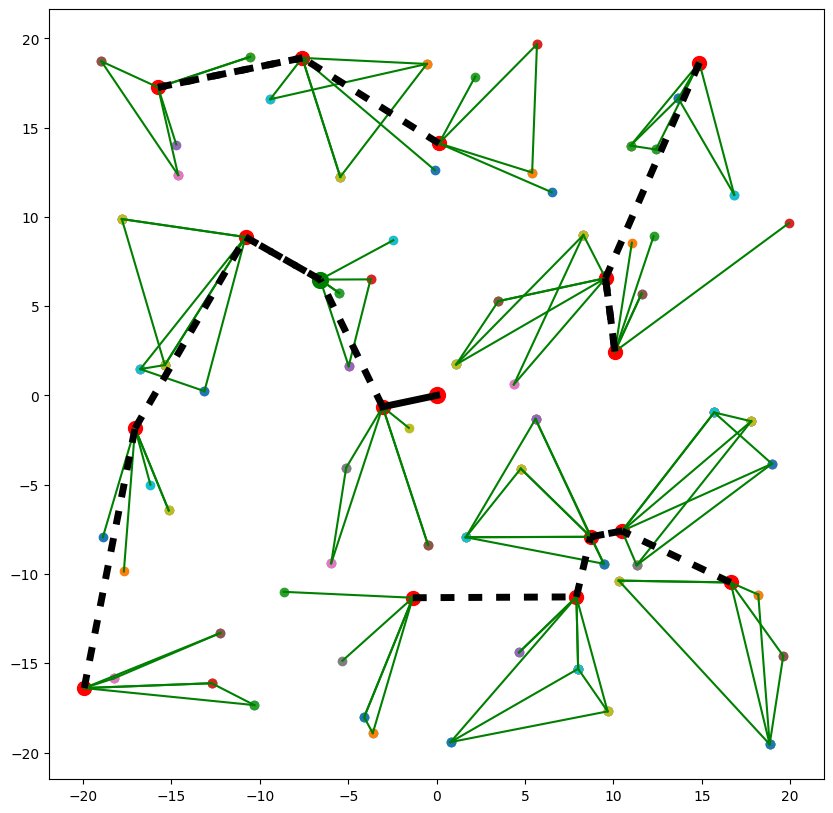

In [38]:
init_main_nodes_connected_to_central()

plt.figure(figsize = (10, 10))
draw_edges(edge_list_per_cluster)
draw_main_nodes(main_nodes)
closest_node = find_closest_node_to_central(main_nodes)
main_node_connected_to_central[closest_node] = True
connected_main_nodes = connect_main_nodes(main_nodes)
neigbour = recursively_set_other_nodes_as_connected_to_central(closest_node, main_node_connected_to_central, connected_main_nodes)
plt.scatter([central_node[0]], [central_node[1]], color = "red", s = 130)
plt.scatter([neigbour[0]], [neigbour[1]], color = "green", s = 130)

for x in connected_main_nodes:
    if x[1] != None:
        plt.plot([x[0][0], x[1][0]], [x[0][1], x[1][1]], lw = 5, color = "black", dashes = [2])
#         plt.scatter([x[0][0], x[1][0]], [x[0][1], x[1][1]])
plt.plot([central_node[0], closest_node[0]], [central_node[1], closest_node[1]], lw = 5, color = "black")

In [22]:
main_node_connected_to_central

{(-19.936390967129082, -16.38920976456791): False,
 (-17.060972335745983, -1.840105280316056): False,
 (-10.81093998238255, 8.868429745829104): False,
 (-15.757079881100223, 17.251841603033796): False,
 (-1.34925474303531, -11.331221419153213): False,
 (-3.0547455623346895, -0.6388741759279313): True,
 (-6.587309886421625, 6.485919523534577): False,
 (-7.601592992415494, 18.902516403618783): False,
 (7.903599668561143, -11.283623777111021): False,
 (8.703662434690127, -7.918917582270515): False,
 (9.551262794058522, 6.569019694163789): False,
 (0.13056977748012732, 14.116116309374398): False,
 (16.62437153444124, -10.476218718044588): False,
 (10.488251256142389, -7.593075750106478): False,
 (10.081730433795421, 2.457145080705534): False,
 (14.857251824763429, 18.63529387370906): False}